<a href="https://colab.research.google.com/github/dibkb/tensorflow-udemy/blob/main/Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
def plot_history(model_history):
  df = pd.DataFrame(model_history.history)
  loss = df['loss']
  accuracy = df['accuracy']
  val_loss = df['val_loss']
  val_accuracy = df['val_accuracy']
  epochs = range(len(df['val_loss']))

    # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

   # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [12]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-12-13 17:28:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 74.125.143.207, 173.194.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  35.5MB/s    in 5.1s    

2023-12-13 17:28:14 (31.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [13]:
# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [14]:
import tensorflow as tf
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
SEED = 42
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,

                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode = "categorical",
                                                                 image_size=IMAGE_SIZE,seed = SEED)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,

                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode = "categorical",
                                                                 image_size=IMAGE_SIZE,seed = SEED)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [15]:
print("Classnames available \n")
for name in train_data.class_names:
  print(name)

Classnames available 

chicken_curry
chicken_wings
fried_rice
grilled_salmon
hamburger
ice_cream
pizza
ramen
steak
sushi


In [16]:
import matplotlib.pyplot as plt
import random
def plotrandom():
  take = random.randint(1, int(750/BATCH_SIZE))
  for images, labels in train_data.take(take):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
    for i in range(3):
        for j in range(3):
            axes[i, j].imshow(images[i * 3 + j]/255.,)
            axes[i, j].axis('off')  # Disable axes
    return


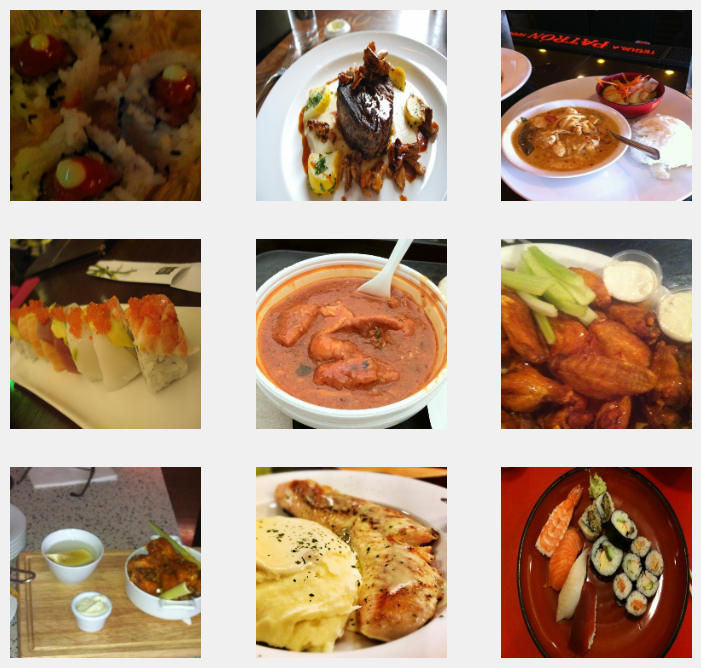

In [17]:
plotrandom()

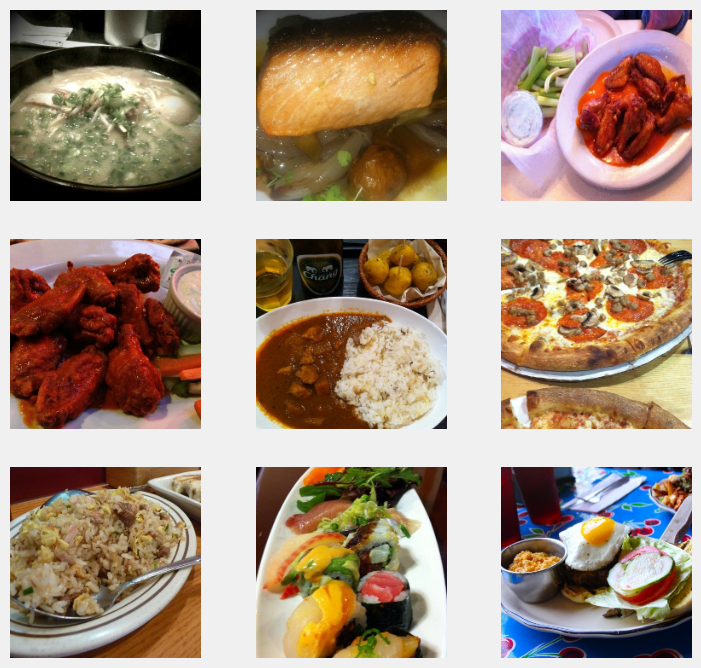

In [18]:
plotrandom()

In [19]:
# Building a base model
base = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base.trainable = False

input = tf.keras.layers.Input(shape = IMAGE_SIZE + (3,),name="input layer")
x = base(input)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

output = tf.keras.layers.Dense(10,activation="softmax")(x)

model_zero = tf.keras.Model(input,output)


24274472/24274472 [==============================] - 1s 0us/step


In [20]:
# compile the model
model_zero.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
# training the model
model_zero_history = model_zero.fit(train_data,epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
24/24 [==============================] - 27s 445ms/step - loss: 1.9076 - accuracy: 0.3960 - val_loss: 1.3235 - val_accuracy: 0.7192
Epoch 2/5
24/24 [==============================] - 7s 265ms/step - loss: 1.1374 - accuracy: 0.7413 - val_loss: 0.8900 - val_accuracy: 0.8184
Epoch 3/5
24/24 [==============================] - 8s 314ms/step - loss: 0.8514 - accuracy: 0.8133 - val_loss: 0.7140 - val_accuracy: 0.8436
Epoch 4/5
24/24 [==============================] - 7s 282ms/step - loss: 0.6901 - accuracy: 0.8467 - val_loss: 0.6208 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 8s 294ms/step - loss: 0.5829 - accuracy: 0.8787 - val_loss: 0.5637 - val_accuracy: 0.8608


In [21]:
model_zero.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


<ipython-input-22-d4be0023ac5d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


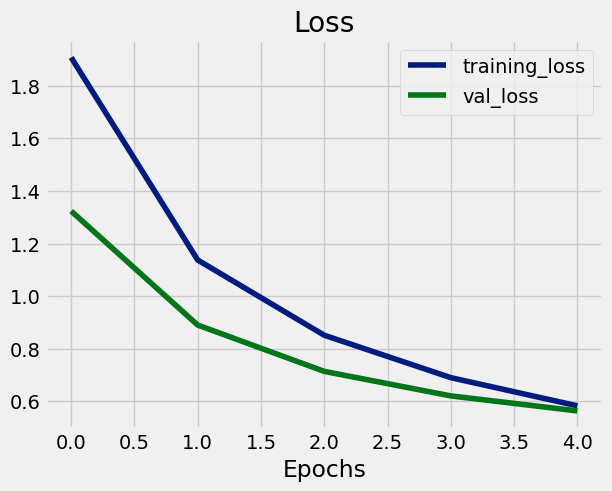

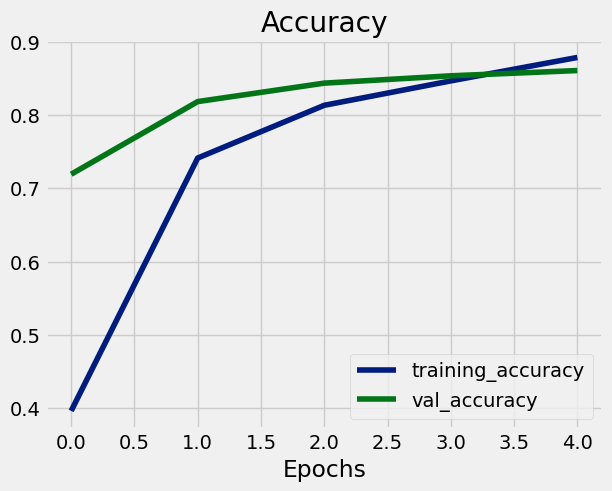

In [22]:
plt.style.use('seaborn-dark-palette')
plot_history(model_zero_history)

In [23]:
# Model 1

# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2023-12-13 17:29:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 142.251.18.207, 142.250.153.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M  37.1MB/s    in 3.8s    

2023-12-13 17:29:30 (33.7 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [6]:
# Data Augmentation
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
])

In [24]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,

                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode = "categorical",
                                                                 image_size=IMAGE_SIZE,seed = SEED)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,

                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode = "categorical",
                                                                 image_size=IMAGE_SIZE,seed = SEED)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [29]:
base_one = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_one.trainable = False
input = layers.Input(shape = IMAGE_SIZE + (3,))
x  = data_augmentation(input)

x = base_one(x,training = False)
x = layers.GlobalAveragePooling2D()(x)

output = layers.Dense(10,activation = "softmax")(x)

model_one = keras.Model(input,output)

In [34]:
# compile
model_one.compile(loss = "categorical_crossentropy",optimizer=keras.optimizers.Adam(),metrics = ["accuracy"])
model_one_history = model_one.fit(train_data,epochs = 5,steps_per_epoch = len(train_data),validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
3/3 [==============================] - 17s 4s/step - loss: 1.6674 - accuracy: 0.6286 - val_loss: 1.7694 - val_accuracy: 0.4716
Epoch 2/5
3/3 [==============================] - 8s 4s/step - loss: 1.4958 - accuracy: 0.6571 - val_loss: 1.6946 - val_accuracy: 0.5076
Epoch 3/5
3/3 [==============================] - 7s 3s/step - loss: 1.3737 - accuracy: 0.7571 - val_loss: 1.6227 - val_accuracy: 0.5348
Epoch 4/5
3/3 [==============================] - 8s 4s/step - loss: 1.3123 - accuracy: 0.8000 - val_loss: 1.5559 - val_accuracy: 0.5732
Epoch 5/5
3/3 [==============================] - 6s 3s/step - loss: 1.1679 - accuracy: 0.8714 - val_loss: 1.4953 - val_accuracy: 0.6000


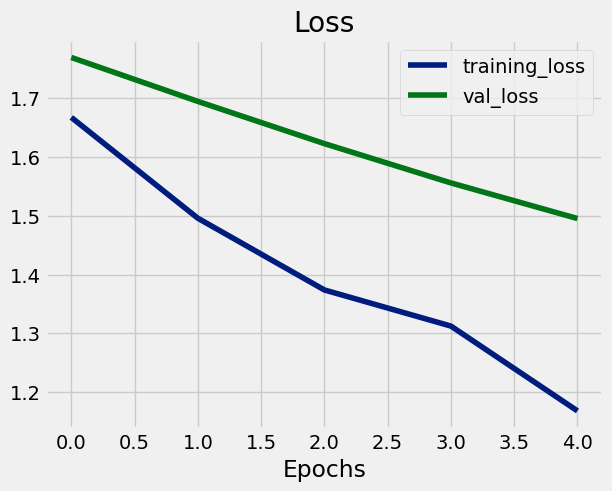

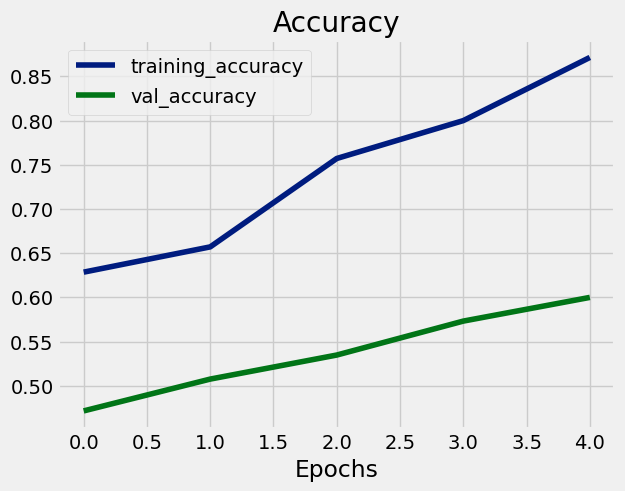

In [35]:
plot_history(model_one_history)